Deep Neural Network (DNN) - MNIST Example
=========================================
Deep Neural Network (DNN) with Tensor Flow **(Keras - CNN)** 


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import logging
import math


## 1/ Versions

In [2]:
print('\n==================================================')
print('MNIST example using Tensorflow and Keras/CNN')
print('==================================================\n')
print('TensorFlow version : ',tf.__version__)
print('Keras version      : ',tf.keras.__version__)



MNIST example using Tensorflow and Keras/CNN

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf


## 2/ Some usefull little stuff

In [3]:
def plot_images(x,y, indices, columns=12, x_size=1, y_size=1, colorbar=False, y_pred=None,save_as=None, cm='binary'):
    """
    Show some images in a grid, with legends
    args:
        X: images
        y: real classes
        indices: indices of images to show
        columns: number of columns (12)
        x_size,y_size: figure size
        colorbar: show colorbar (False)
        y_pred: predicted classes (None)
        cm: Matplotlib olor map
    returns: 
        nothing
    """
    rows    = math.ceil(len(indices)/columns)
    fig=plt.figure(figsize=(columns*x_size, rows*(y_size+0.35)))
    n=1
    errors=0 
    if np.any(y_pred)==None:
        y_pred=y
    for i in indices:
        axs=fig.add_subplot(rows, columns, n)
        n+=1
        img=axs.imshow(x[i],cmap = cm)
        axs.spines['right'].set_visible(True)
        axs.spines['left'].set_visible(True)
        axs.spines['top'].set_visible(True)
        axs.spines['bottom'].set_visible(True)
        axs.set_yticks([])
        axs.set_xticks([])
        if y[i]!=y_pred[i]:
            axs.set_xlabel('{} ({})'.format(y_pred[i],y[i]))
            axs.xaxis.label.set_color('red')
            errors+=1
        else:
            axs.set_xlabel(y[i])
        if colorbar:
            fig.colorbar(img,orientation="vertical", shrink=0.65)
    plt.show()
    
def plot_history(history, figsize=(8,6), save_as=None):
    """
    Show history
    args:
        history: history
        save_as: filename to save or None
    """
    # Accuracy 
    plt.figure(figsize=figsize)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Loss values
    plt.figure(figsize=figsize)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## 3/ Retrieve data

In [4]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0],   img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32')  / 255

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


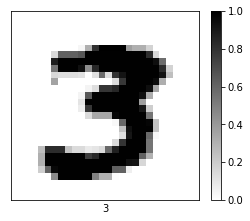

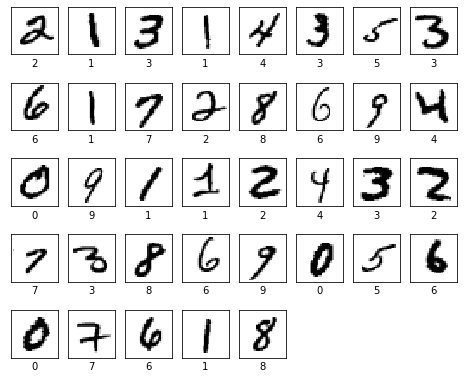

In [5]:
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

plot_images(x_train.reshape(-1,28,28),y_train, [27],  x_size=5,y_size=5, colorbar=True,save_as="One-digits")
plot_images(x_train.reshape(-1,28,28),y_train, range(5,42), columns=8, save_as="Many-digits")

## 4/ Create model

In [6]:
batch_size  =  64
num_classes =  10
epochs      =  4

In [7]:
model = keras.models.Sequential()
model.add( keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #32
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(64, (3, 3), activation='relu')) #32
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(128,(3, 3), activation='relu')) #64
model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(1152, activation='relu')) # 576
model.add( keras.layers.Dense(200, activation='relu'))
model.add( keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W1220 15:41:03.113452 139972819817856 deprecation.py:506] From /home/pjluc/anaconda3/envs/deeplearning/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1152)              1

## 5/ Run it
Take Arround 65 seconds on a laptop ou few seconds on a "bigfoot" ;-)

In [8]:
%%time

history = model.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',     score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s 262us/sample - loss: 0.1307 - acc: 0.9596 - val_loss: 0.0394 - val_acc: 0.9878
Epoch 2/4
60000/60000 [==============================] - 17s 282us/sample - loss: 0.0433 - acc: 0.9863 - val_loss: 0.0496 - val_acc: 0.9839
Epoch 3/4
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0291 - acc: 0.9916 - val_loss: 0.0373 - val_acc: 0.9874
Epoch 4/4
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0423 - val_acc: 0.9883
Test loss: 0.04227137414527806
Test accuracy: 0.9883
CPU times: user 4min 48s, sys: 19.5 s, total: 5min 8s
Wall time: 1min 7s


## 6/ Evaluation
Normaly we can expect >99% of accuracy...

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])

Test loss    : 0.04227137414527806
Test accuracy: 0.9883


## 7/ History

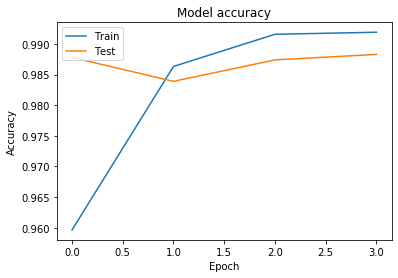

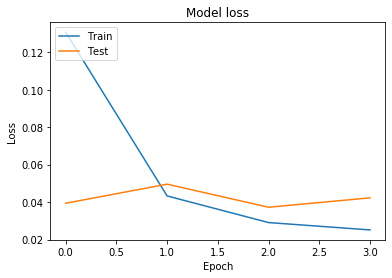

In [10]:
plot_history(history, figsize=(6,4), save_as="history")

## 8/ Some predictions
Show 200 digits with predictions and (may be) errors (in red)

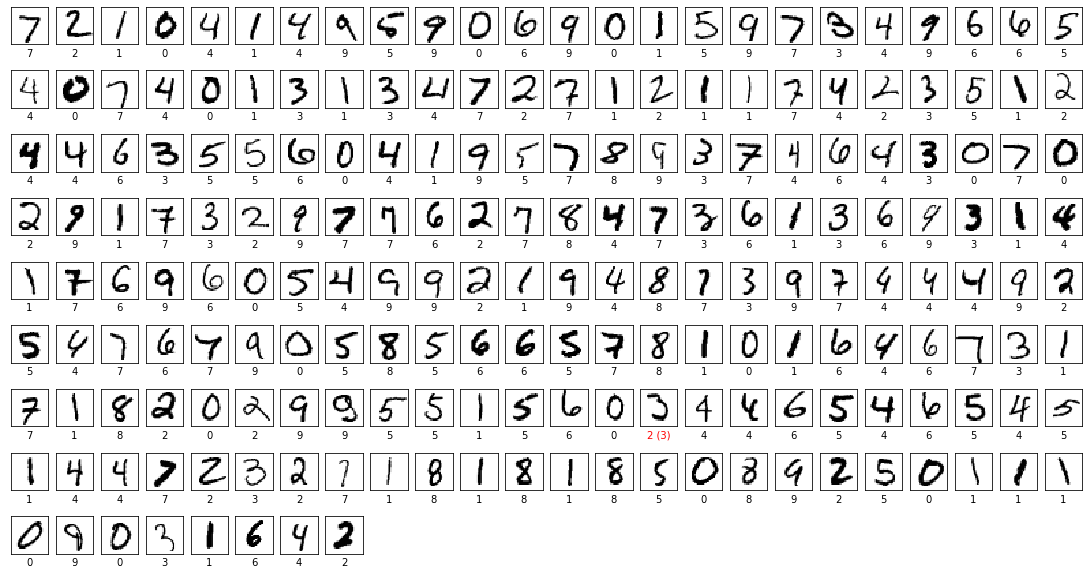

In [11]:
y_pred   = model.predict_classes(x_test)
plot_images(x_test.reshape(-1,28,28), y_test, range(0,200), columns=24, x_size=0.8, y_size=0.8, y_pred=y_pred)

## 9/ Some errors

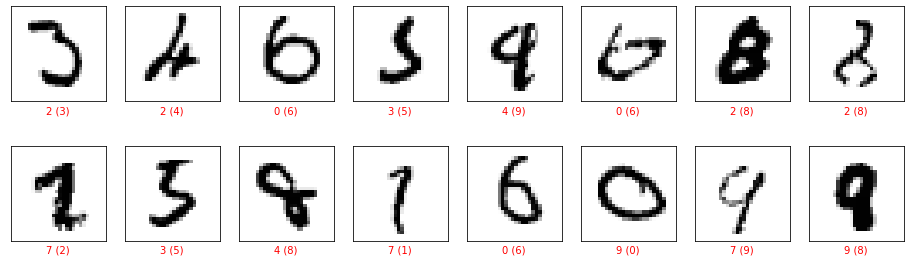

In [12]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
plot_images(x_test.reshape(-1,28,28), y_test, errors[:16], columns=8, x_size=2, y_size=2, y_pred=y_pred)

That's all folks !